<h1>Computational Neuroscience Experiment 7</h1>
<h3>Roshan Srivastava

J047

MBA Tech. EXTC SEM 8</h3>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading and Cleaning Data

In [3]:
def reshape_normalize(arr):
    arr = np.array(arr)
    return (arr - np.min(arr))/(np.max(arr)-np.min(arr))

In [4]:
f_right = pd.read_csv('exported_data/ftheta_right.csv')
f_left = pd.read_csv('exported_data/ftheta_left.csv')
o_right = pd.read_csv('exported_data/otheta_right.csv') #O4
o_left = pd.read_csv('exported_data/otheta_left.csv')  #O3

# Normalizing Data 

In [5]:
for df in [f_right,f_left]:
    df['before'] = np.sum(df.iloc[:,3:6],axis=1)    
    df['during'] = np.sum(df.iloc[:,6:9],axis=1)    
    df['after'] = np.sum(df.iloc[:,9:12],axis=1) 
    df.drop(columns = list(df.columns)[3:12],inplace=True)  
    df.iloc[:,4:7] = df.iloc[:,4:7].apply(reshape_normalize)

for df in [o_left,o_right]:
    df.iloc[:,3:6] = df.iloc[:,3:6].apply(reshape_normalize)

# Seperating A and N Data

In [6]:
for typ in ['o','f']:
    for direc in ['left','right']:
        for app in [['appreciator','A'],['nonappreciator','N']]:
            exec(f"{typ}_{direc}_{app[0]} = {typ}_{direc}.loc[{typ}_{direc}['Rating'] == '{app[1]}'][['Sr.','before','during','after']].reset_index(drop=True)")

# Performing T-Tests and ANOVA

In [7]:
print("Paired T-Test")
for typ in ['o','f']:
    for app in ['appreciator','nonappreciator']:
        for direc in ['left','right']:
            for state in [['before','during'],['during','after'],['before','after']]:
                exec(f"stat = stats.ttest_rel({typ}_{direc}_{app}['{state[0]}'],{typ}_{direc}_{app}['{state[1]}'])") 
                print(f"For {direc} brain, {typ} theta, {app} class between '{state[0]}' and '{state[1]}': statistic = {stat.statistic:.3f} and p-value = {stat.pvalue:.3f}")
            print()

Paired T-Test
For left brain, o theta, appreciator class between 'before' and 'during': statistic = -3.415 and p-value = 0.002
For left brain, o theta, appreciator class between 'during' and 'after': statistic = 3.423 and p-value = 0.002
For left brain, o theta, appreciator class between 'before' and 'after': statistic = -0.489 and p-value = 0.628

For right brain, o theta, appreciator class between 'before' and 'during': statistic = 0.612 and p-value = 0.546
For right brain, o theta, appreciator class between 'during' and 'after': statistic = -0.231 and p-value = 0.819
For right brain, o theta, appreciator class between 'before' and 'after': statistic = 0.656 and p-value = 0.517

For left brain, o theta, nonappreciator class between 'before' and 'during': statistic = -1.817 and p-value = 0.099
For left brain, o theta, nonappreciator class between 'during' and 'after': statistic = 1.907 and p-value = 0.086
For left brain, o theta, nonappreciator class between 'before' and 'after': stat

In [8]:
print("ANOVA")
for typ in ['o','f']:
    for app in ['appreciator','nonappreciator']:
        for direc in ['left','right']:
            exec(f"stat = stats.f_oneway({typ}_{direc}_{app}['before'],{typ}_{direc}_{app}['during'],{typ}_{direc}_{app}['after'])") 
            print(f"For {direc} brain, {typ} theta, {app} class yielded a statistic of {stat.statistic:.3f} and p-value of {stat.pvalue:.3f}")
        print()

ANOVA
For left brain, o theta, appreciator class yielded a statistic of 2.100 and p-value of 0.129
For right brain, o theta, appreciator class yielded a statistic of 0.247 and p-value of 0.782

For left brain, o theta, nonappreciator class yielded a statistic of 1.960 and p-value of 0.159
For right brain, o theta, nonappreciator class yielded a statistic of 0.521 and p-value of 0.599

For left brain, f theta, appreciator class yielded a statistic of 1.222 and p-value of 0.300
For right brain, f theta, appreciator class yielded a statistic of 0.944 and p-value of 0.393

For left brain, f theta, nonappreciator class yielded a statistic of 0.260 and p-value of 0.772
For right brain, f theta, nonappreciator class yielded a statistic of 0.162 and p-value of 0.851



In [9]:
print("Kruskal")
for typ in ['o','f']:
    for app in ['appreciator','nonappreciator']:
        for direc in ['left','right']:
            exec(f"stat = stats.kruskal({typ}_{direc}_{app}['before'],{typ}_{direc}_{app}['during'],{typ}_{direc}_{app}['after'])") 
            # print(f"For {direc} brain, {typ} theta, {app} class yielded a statistic of {stat.statistic:.3f} and p-value of {stat.pvalue:.3f}")
            print(f"For {direc} hemisphere of brain and {typ} theta channel, {app} class between '{state[0]}' and '{state[1]}': statistic = {stat.statistic:.3f} and p-value = {stat.pvalue:.3f}")

        print()

Kruskal
For left hemisphere of brain and o theta channel, appreciator class between 'before' and 'after': statistic = 22.267 and p-value = 0.000
For right hemisphere of brain and o theta channel, appreciator class between 'before' and 'after': statistic = 5.293 and p-value = 0.071

For left hemisphere of brain and o theta channel, nonappreciator class between 'before' and 'after': statistic = 6.956 and p-value = 0.031
For right hemisphere of brain and o theta channel, nonappreciator class between 'before' and 'after': statistic = 3.789 and p-value = 0.150

For left hemisphere of brain and f theta channel, appreciator class between 'before' and 'after': statistic = 3.032 and p-value = 0.220
For right hemisphere of brain and f theta channel, appreciator class between 'before' and 'after': statistic = 0.838 and p-value = 0.658

For left hemisphere of brain and f theta channel, nonappreciator class between 'before' and 'after': statistic = 0.155 and p-value = 0.926
For right hemisphere of 

In [18]:
print("Wilcoxon")
for typ in ['o','f']:
    for app in ['appreciator','nonappreciator']:
        for direc in ['left','right']:
            for state in [['before','during'],['during','after'],['before','after']]:
                exec(f"stat = stats.wilcoxon({typ}_{direc}_{app}['{state[0]}'],{typ}_{direc}_{app}['{state[1]}'])") 
                print(f"For {direc} brain, {typ} theta, {app} class between '{state[0]}' and '{state[1]}': statistic = {stat.statistic:.3f} and p-value = {stat.pvalue:.3f}")
            print()

Wilcoxon
For left brain, o theta, appreciator class between 'before' and 'during': statistic = 28.000 and p-value = 0.000
For left brain, o theta, appreciator class between 'during' and 'after': statistic = 29.000 and p-value = 0.000
For left brain, o theta, appreciator class between 'before' and 'after': statistic = 200.000 and p-value = 0.946

For right brain, o theta, appreciator class between 'before' and 'during': statistic = 93.000 and p-value = 0.012
For right brain, o theta, appreciator class between 'during' and 'after': statistic = 72.000 and p-value = 0.002
For right brain, o theta, appreciator class between 'before' and 'after': statistic = 207.000 and p-value = 0.820

For left brain, o theta, nonappreciator class between 'before' and 'during': statistic = 0.000 and p-value = 0.001
For left brain, o theta, nonappreciator class between 'during' and 'after': statistic = 0.000 and p-value = 0.001
For left brain, o theta, nonappreciator class between 'before' and 'after': stati

In [17]:
print("Mann-Whitney")
for typ in ['o','f']:
    for app in ['appreciator','nonappreciator']:
        for direc in ['left','right']:
            for state in [['before','during'],['during','after'],['before','after']]:
                exec(f"stat = stats.mannwhitneyu({typ}_{direc}_{app}['{state[0]}'],{typ}_{direc}_{app}['{state[1]}'])") 
                print(f"For {direc} brain, {typ} theta, {app} class between '{state[0]}' and '{state[1]}': statistic = {stat.statistic:.3f} and p-value = {stat.pvalue:.3f}")
            print()

Mann-Whitney
For left brain, o theta, appreciator class between 'before' and 'during': statistic = 150.500 and p-value = 0.000
For left brain, o theta, appreciator class between 'during' and 'after': statistic = 674.500 and p-value = 0.000
For left brain, o theta, appreciator class between 'before' and 'after': statistic = 422.000 and p-value = 0.988

For right brain, o theta, appreciator class between 'before' and 'during': statistic = 554.000 and p-value = 0.039
For right brain, o theta, appreciator class between 'during' and 'after': statistic = 298.500 and p-value = 0.059
For right brain, o theta, appreciator class between 'before' and 'after': statistic = 412.500 and p-value = 0.907

For left brain, o theta, nonappreciator class between 'before' and 'during': statistic = 24.000 and p-value = 0.018
For left brain, o theta, nonappreciator class between 'during' and 'after': statistic = 91.000 and p-value = 0.049
For left brain, o theta, nonappreciator class between 'before' and 'aft

Bar Graphs


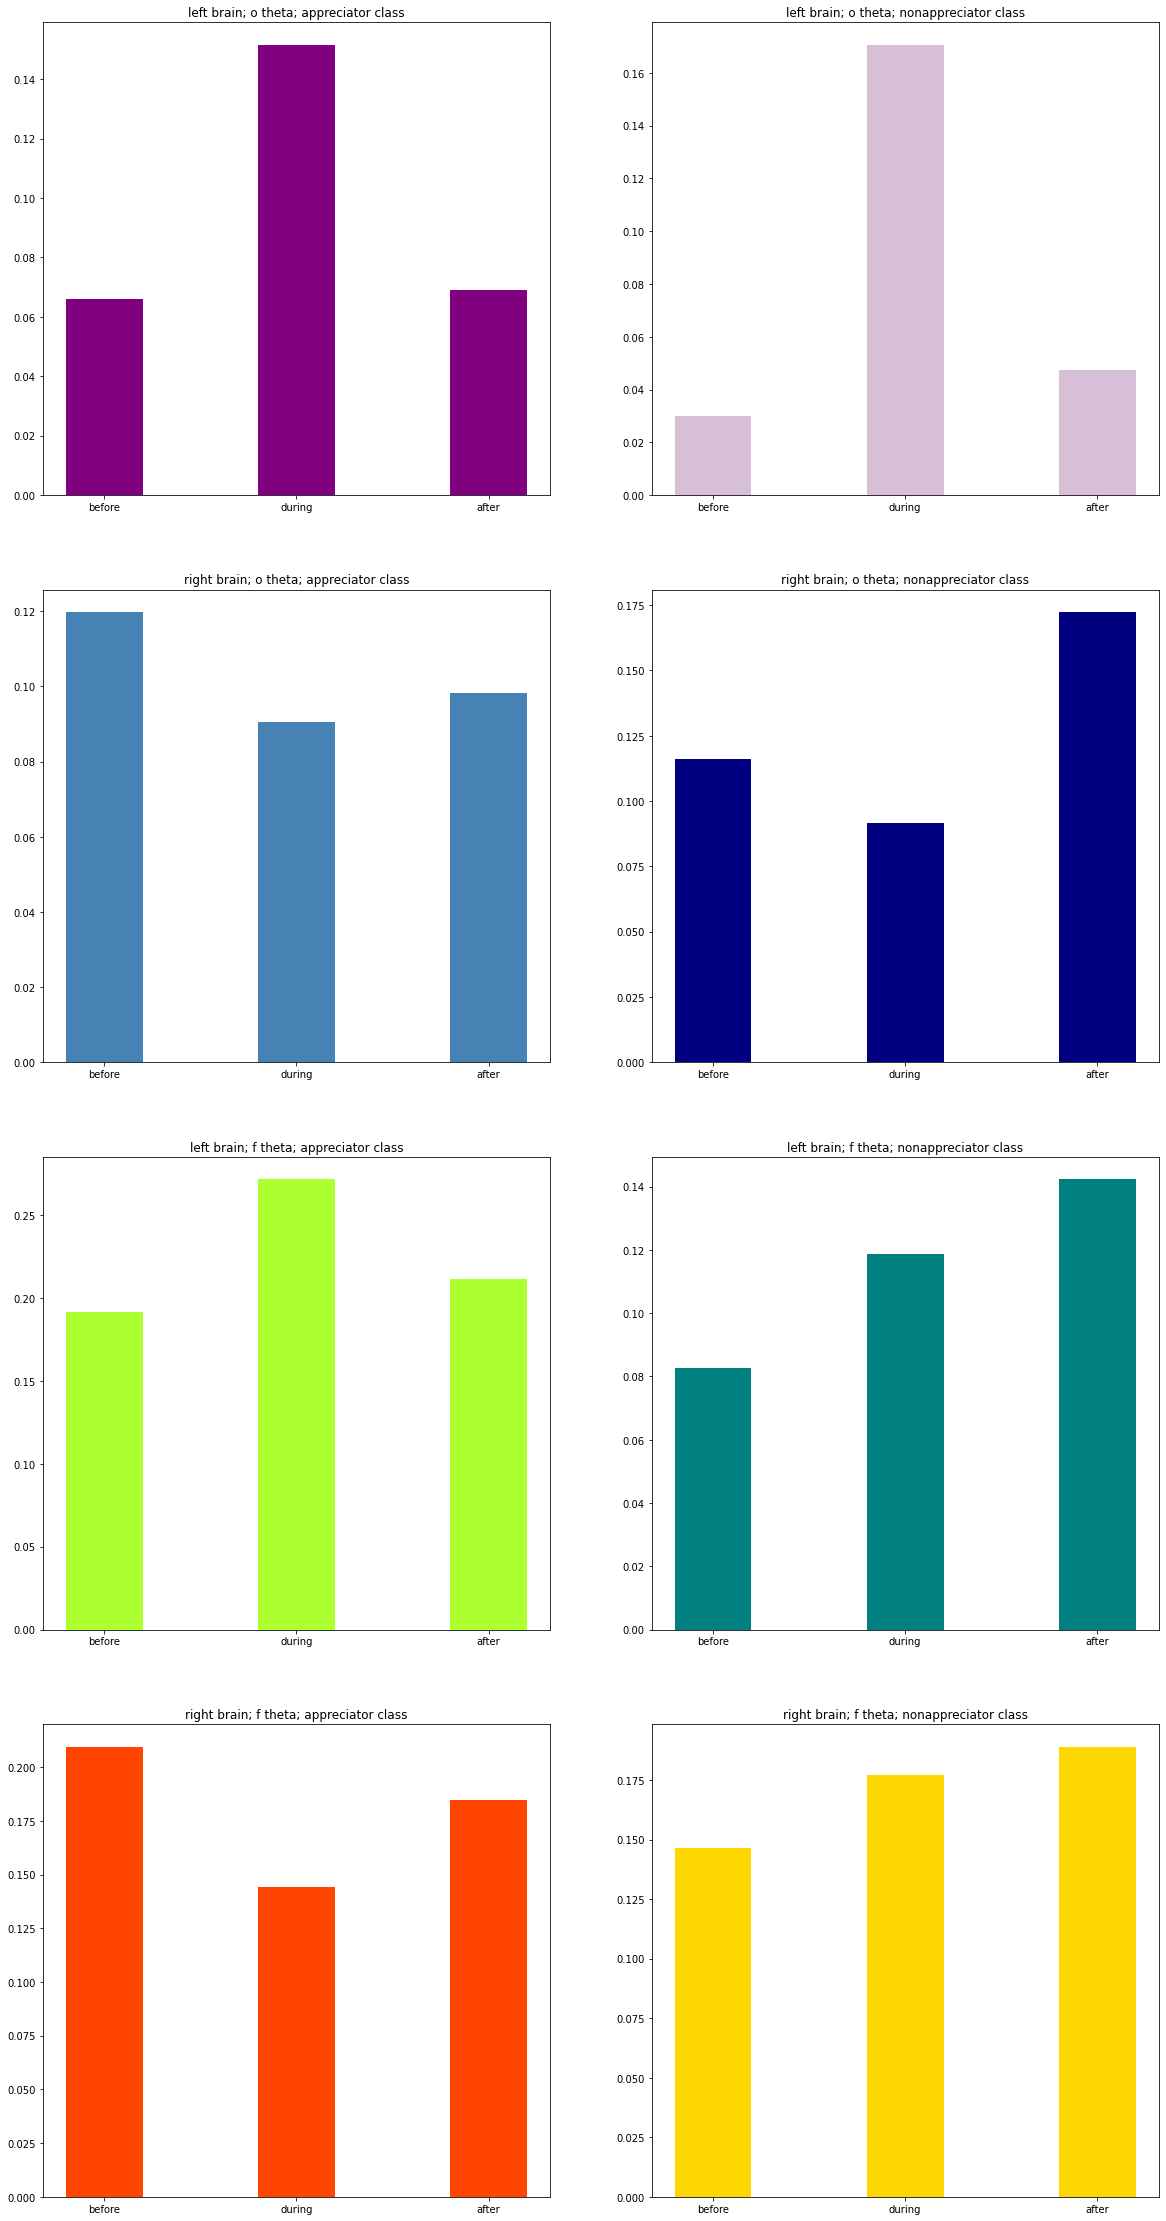

In [42]:
print("Bar Graphs")
cols = ["",'purple','thistle','steelblue','navy','greenyellow','teal','orangered','gold']
plt.figure(figsize=(20,40))
iter = 1
for typ in ['o','f']:
    for direc in ['left','right']:
        for app in ['appreciator','nonappreciator']:
            plt.subplot(4,2,iter)
            exec(f"means = dict({typ}_{direc}_{app}.mean()); del means['Sr.']")
            plt.bar(means.keys(), means.values(), color =cols[iter],width = 0.4)
            plt.title(f"{direc} brain; {typ} theta; {app} class")
            iter += 1          